# Devoir à la maison : prédiction de diamètres d'astéroïdes

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

On dispose de dispose de deux ensembles de données, qui contiennent les paramètres orbitaux d'astéroïdes. L'un des pour un des ensembles, on dispose des diamètres de chaque astéroïde :

In [41]:
data1 = pd.read_csv('astro.csv')
data1

,Name,Absolute_magnitude,Color_index,Diameter_km,Argument_of_perihelion,Longitude_of_ascending_node,Inclination,Eccentricity,Semimajor_axis_AU
0,Ceres,3.33,0.72,848.4,73.470135,80.260196,10.586334,0.078817,2.767182
1,Pallas,4.12,0.66,498.1,310.864825,172.918176,34.926950,0.230084,2.769632
2,Juno,5.16,0.81,233.9,247.736324,169.843244,12.990663,0.256468,2.670137
3,Vesta,3.22,0.80,468.3,151.598805,103.757459,7.139175,0.088757,2.363038
4,Astraea,7.00,0.83,119.1,358.885807,141.523480,5.360136,0.187924,2.578698
...,...,...,...,...,...,...,...,...,...
779,Heiskanen,11.11,0.65,31.6,176.588303,151.263843,0.470181,0.276097,3.164924
780,Welch,11.80,0.70,25.4,3.161190,128.063879,2.254055,0.140645,3.197549
781,Pandarus,9.24,0.76,97.9,42.648961,179.696471,1.855291,0.069400,5.198246
782,Kacha,10.18,0.72,57.9,150.321722,352.496752,13.483509,0.119881,3.993807


Pour l'autre ensemble de données, on ne connait pas les diamètres :

In [42]:
data2 = pd.read_csv('astro3.csv')
data2

,Name,Absolute_magnitude,Argument_of_perihelion,Longitude_of_ascending_node,Inclination,Eccentricity,Semimajor_axis_AU
0,Hirose,10.91,243.992268,319.471036,16.838378,0.092483,3.100010
1,Greenwich,12.64,141.608510,48.886337,25.380236,0.205849,2.377384
2,Chuvaev,14.12,162.952143,180.614252,1.333989,0.189516,2.339375
3,Yaronika,13.34,312.248048,237.120978,2.557393,0.145219,2.345336
4,Iwan,13.90,320.705870,341.595917,4.301991,0.091468,2.245010
...,...,...,...,...,...,...,...
1575,2022UQ38,19.85,144.358861,268.281055,1.823155,0.159302,2.260395
1576,2022US52,18.04,299.992350,96.309547,3.397636,0.184806,3.107503
1577,2022UQ79,18.31,174.285081,205.728392,16.314463,0.332638,3.070122
1578,2022UD81,18.40,331.460805,20.356306,4.947286,0.156860,2.654386


## Problème à résoudre

Proposer une méthode pour prédire les diamètres des astéroïdes du second ensemble de données. Évaluer la qualité de votre prédiction.

On pourra s'inspirer de la méthode du TP4.

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
X_train = data1.to_numpy()
y_train = X_train[:, 3]
X_train = np.delete(X_train, [0, 2, 3], axis=1)
print(f"les inputs {X_train}")
print(f"les outputs {y_train}")

les inputs [[3.33 73.470135 80.260196 10.586334 0.07881731 2.76718176]
 [4.12 310.864825 172.918176 34.92695 0.23008432 2.7696317]
 [5.16 247.736324 169.843244 12.990663 0.25646812 2.67013684]
 ...
 [9.24 42.648961 179.696471 1.855291 0.06940032 5.19824608]
 [10.18 150.321722 352.496752 13.483509 0.11988106 3.99380727]
 [9.08 173.174302 108.779726 14.666129 0.07717727 5.14199452]]
les outputs [848.4 498.1 233.9 468.3 119.1 185.2 199.8 135.9 407.1 153.3 112.8 207.6
 255.3 253.2 90.0 140.6 145.5 95.8 181.0 107.5 75.1 95.1 120.9 212.2 99.7
 255.9 80.8 113.5 103.1 105.6 108.3 115.9 149.5 107.6 174.0 100.2 65.9
 70.6 214.6 124.1 127.0 221.8 149.8 99.8 147.9 302.5 115.4 165.8 66.7
 113.2 112.6 93.4 164.8 60.2 82.0 95.4 103.1 237.3 72.8 58.1 122.6 138.1
 122.2 83.4 86.1 44.4 118.7 55.7 183.7 69.2 120.6 66.5 78.4 119.1 61.0
 81.4 79.2 154.8 120.6 260.9 200.6 151.5 120.1 109.8 126.4 141.0 204.9
 136.0 169.9 82.8 104.5 71.9 88.7 65.8 83.0 91.2 123.7 119.1 146.6 222.6
 65.0 89.4 86.1 134.6 72.2 4

In [45]:
val_num = 200
train_num = len(X_train) - val_num

X_val, y_val = X_train[val_num:], y_train[val_num:]
X_train, y_train = X_train[:train_num], y_train[:train_num]

In [46]:
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.score(X_val, y_val)

0.3481434542232309

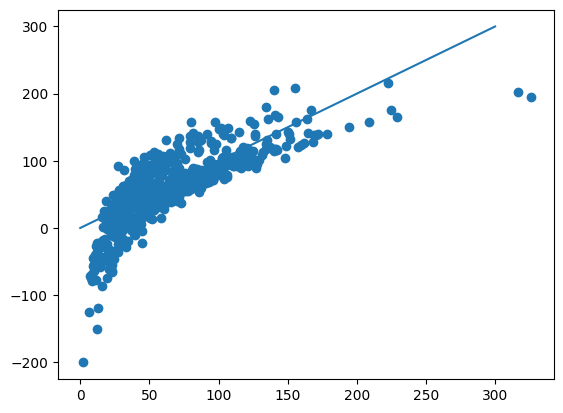

In [47]:
y_pred = regr.predict(X_val)

plt.scatter(y_val, y_pred)
xlab = np.linspace(0, 300, 1000)
plt.plot(xlab, xlab)

## Attentes pour ce devoir maison

Votre rendu doit être sous une des deux formes suivantes :
* un notebook avec votre code python ainsi que les explications de votre méthode.
* un notebook avec uniquement le code, et un fichier `.pdf` avec vos explications.

Dans votre compte rendu, vous devrez expliquer les choix techniques que vous avez fait. 

Votre code doit fonctionnner en exécutant les cellules une par une en partant de la première. Vous pouvez tester que cela marche bien en utilisant la touche ⏩ de Jupyter. Vous devez, à la fin, avoir : ou bien une fonction qui à une ligne du deuxième ensemble de données associe une prédiction du diamètre ; ou alors un tableau qui contient les prédictions des diamètres pour chaque ligne du deuxième ensemble de données.

La note portera :
* à 70% sur la qualité de vos explications de la méthodes choisie.
* à 30% sur la qualité et la clarté du code en Python.